Anomaly detection in AppleStore dataset :

The main goal is to identify anomaly in rating of the current version of app. Anomaly is determined when rating of an app is less than its previous version rating. By this analysis, app developer will have an idea about the progress of app and points of improvement

Input dataset : https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps#AppleStore.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
%matplotlib inline

In [2]:
#Reading file AppleStore
Path = r'C:\Users\Dhwani\Desktop\AppoMania\AppleStore.csv'
appleStoreDf = pd.read_csv(Path,parse_dates=True)
appleStoreDf.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [3]:
appleStoreDf.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

Text(0,0.5,'Ratings')

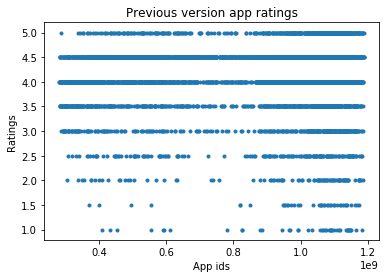

In [4]:
# Plotting previous version rating of app
plt.scatter(appleStoreDf['id'][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)]
            , appleStoreDf['user_rating'][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)]
            , marker='.');

plt.title('Previous version app ratings')
plt.xlabel('App ids')
plt.ylabel('Ratings')

Text(0,0.5,'Ratings')

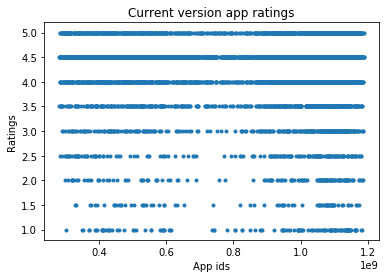

In [5]:
# Plotting current version rating of app

plt.scatter(appleStoreDf['id'][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)]
            , appleStoreDf['user_rating_ver'][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)]
            , marker='.');

plt.title('Current version app ratings')
plt.xlabel('App ids')
plt.ylabel('Ratings')

In [6]:
print(len(appleStoreDf[['user_rating']][appleStoreDf.user_rating==0]))
print(len(appleStoreDf[['user_rating']][appleStoreDf.user_rating!=0]))
print(len(appleStoreDf[['user_rating_ver']][appleStoreDf.user_rating_ver==0]))
print(len(appleStoreDf[['user_rating_ver']][appleStoreDf.user_rating_ver!=0]))

929
6268
1443
5754


In [7]:
data = appleStoreDf[['user_rating', 'user_rating_ver']][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)]
data.head()
#print(data['user_rating'][data.user_rating!=0])

,user_rating,user_rating_ver
0,4.0,4.5
1,4.0,3.5
2,3.5,4.5
3,4.0,4.5
4,4.5,5.0


In [8]:
#Applying Isolation forest model on our dataset

from sklearn import preprocessing
# Take useful feature and standardize them 
data = appleStoreDf[['user_rating', 'user_rating_ver']][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest 
model =  IsolationForest(contamination = 0.05)
model.fit(data)
# add the data to the main  
appleStoreDf['anomaly25'] = pd.Series(model.predict(data))
appleStoreDf['anomaly25'] = appleStoreDf['anomaly25'].map( {1: 0, -1: 1} )
print(appleStoreDf['anomaly25'].value_counts())

0.0    5456
1.0     298
Name: anomaly25, dtype: int64


In [9]:
appleStoreDf.loc[appleStoreDf['anomaly25'] == 1.0]

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,anomaly25
46,54,293760823,iFart - The Original Fart Sounds App,60320768,USD,1.99,21825,10,3.0,4.0,4.0.8,9+,Entertainment,37,5,1,1,1.0
64,73,298127110,ProPresenter Remote,46922752,USD,4.99,410,7,3.0,2.5,4.8.1,4+,Utilities,37,5,1,1,1.0
79,90,301521403,Nike+ Training Club - Workouts & Fitness Plans,140367872,USD,0.00,33969,466,3.5,5.0,5.4.1,4+,Health & Fitness,37,0,17,1,1.0
164,186,320596872,Sparkasse+,119648256,USD,0.99,30,0,3.0,0.0,3.1.3,4+,Finance,37,0,3,1,1.0
211,240,331271904,Bloons TD,8432232,USD,2.99,7941,76,4.0,3.5,1.2.1,4+,Games,47,0,1,1,1.0
220,250,333710667,Scanner Pro - PDF document scanner app with OCR,101346304,USD,3.99,31912,154,4.5,5.0,7.1.3,4+,Business,37,5,9,1,1.0
230,262,335545504,King of Dragon Pass,364490752,USD,9.99,882,85,5.0,5.0,2.3.2,12+,Games,43,5,1,1,1.0
263,297,340779800,The Christmas List,26137600,USD,1.99,2722,1,4.5,5.0,2.1,4+,Shopping,37,0,1,1,1.0
268,302,341776037,5-0 Radio Pro Police Scanner (Extra Feeds),49594368,USD,3.99,24553,2620,4.0,4.5,39.1,9+,News,38,5,26,1,1.0
283,319,345445479,The Sims 3 World Adventures,812758016,USD,2.99,9744,42,3.5,3.0,1.2.21,12+,Games,37,4,6,1,1.0


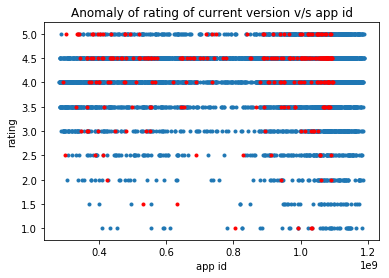

In [10]:
# Plotting anomaly of rating of current version for all apps 

plt.scatter(appleStoreDf['id'][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)]
            , appleStoreDf['user_rating'][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)], marker='.');
plt.scatter(appleStoreDf.loc[appleStoreDf['anomaly25'] == 1]['id'][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)]
            ,appleStoreDf.loc[appleStoreDf['anomaly25'] == 1]['user_rating_ver'][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)]
            ,color='red',marker='.');
plt.title('Anomaly of rating of current version v/s app id')
plt.xlabel("app id")
plt.ylabel("rating")
plt.show()

Text(0,0.5,'Ratings')

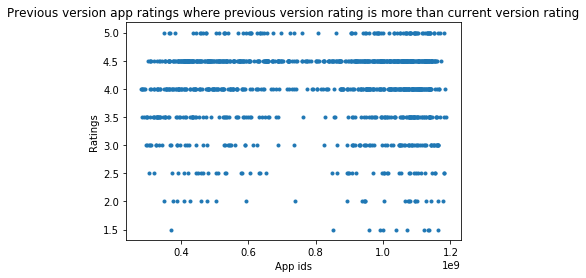

In [11]:
#negative plot
# Plotting previous version rating of app

plt.scatter(appleStoreDf['id'][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0) 
                               & (appleStoreDf.user_rating > appleStoreDf.user_rating_ver)]
            , appleStoreDf['user_rating'][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)
                               &(appleStoreDf.user_rating > appleStoreDf.user_rating_ver)], marker='.');

plt.title('Previous version app ratings where previous version rating is more than current version rating')
plt.xlabel('App ids')
plt.ylabel('Ratings')


In [12]:
data = appleStoreDf[['user_rating', 'user_rating_ver']][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)
                                                       & (appleStoreDf.user_rating > appleStoreDf.user_rating_ver)]
data.head()

,user_rating,user_rating_ver
1,4.0,3.5
11,3.5,2.5
15,4.0,3.5
19,4.0,3.5
28,4.0,3.5


In [13]:
#Applying Isolation forest model on our dataset

from sklearn import preprocessing
# Take useful feature and standardize them 
data = appleStoreDf[['user_rating', 'user_rating_ver']][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)
                                                        & (appleStoreDf.user_rating > appleStoreDf.user_rating_ver)]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest 
model =  IsolationForest(contamination = 0.05)
model.fit(data)
# add the data to the main  
appleStoreDf['anomaly27'] = pd.Series(model.predict(data))
appleStoreDf['anomaly27'] = appleStoreDf['anomaly27'].map( {1: 0, -1: 1} )
print(appleStoreDf['anomaly27'].value_counts())

0.0    1102
1.0      69
Name: anomaly27, dtype: int64


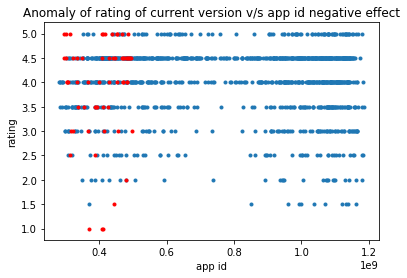

In [14]:
# Plotting anomaly of rating of current version for all apps 

plt.scatter(appleStoreDf['id'][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0) & (appleStoreDf.user_rating > appleStoreDf.user_rating_ver)]
            , appleStoreDf['user_rating'][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)
                                          & (appleStoreDf.user_rating > appleStoreDf.user_rating_ver)], marker='.');
plt.scatter(appleStoreDf.loc[appleStoreDf['anomaly27'] == 1]['id'][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0
                                                                & (appleStoreDf.user_rating > appleStoreDf.user_rating_ver))]
            ,appleStoreDf.loc[appleStoreDf['anomaly27'] == 1]['user_rating_ver'][(appleStoreDf.user_rating_ver!=0) 
                                                                             & (appleStoreDf.user_rating!=0
                                                            & (appleStoreDf.user_rating > appleStoreDf.user_rating_ver))]
            ,color='red',marker='.');
plt.title('Anomaly of rating of current version v/s app id negative effect')
plt.xlabel("app id")
plt.ylabel("rating")
plt.show()

In [15]:
appleStoreDf[(appleStoreDf.user_rating_ver!=0)   & (appleStoreDf.user_rating!=0
                     & (appleStoreDf.user_rating > appleStoreDf.user_rating_ver)) & (appleStoreDf.id == 429851711)]

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,anomaly25,anomaly27
758,867,429851711,Flashlight ！,14336000,USD,0.0,35769,21,4.5,2.0,2.6,4+,Utilities,37,1,1,1,0.0,0.0


In [16]:
appleStoreDf.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,anomaly25,anomaly27
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,0.0,0.0
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,0.0,0.0
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,0.0,0.0
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,0.0,0.0
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,0.0,0.0


In [17]:
# Anomaly check for positive change

data = appleStoreDf[['user_rating', 'user_rating_ver']][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)
                                                       & (appleStoreDf.user_rating < appleStoreDf.user_rating_ver)]
data.head()

,user_rating,user_rating_ver
0,4.0,4.5
2,3.5,4.5
3,4.0,4.5
4,4.5,5.0
6,4.0,4.5


In [18]:
#Applying Isolation forest model on our dataset

from sklearn import preprocessing
# Take useful feature and standardize them 
data = appleStoreDf[['user_rating', 'user_rating_ver']][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)
                                                        & (appleStoreDf.user_rating < appleStoreDf.user_rating_ver)]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest 
model =  IsolationForest(contamination = 0.05)
model.fit(data)
# add the data to the main  
appleStoreDf['anomaly37'] = pd.Series(model.predict(data))
appleStoreDf['anomaly37'] = appleStoreDf['anomaly37'].map( {1: 0, -1: 1} )
print(appleStoreDf['anomaly37'].value_counts())

0.0    1326
1.0      85
Name: anomaly37, dtype: int64


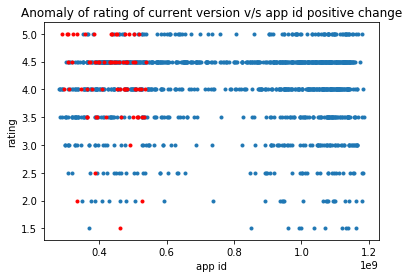

In [19]:
# Plotting anomaly of rating of current version for all apps 

plt.scatter(appleStoreDf['id'][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0) & (appleStoreDf.user_rating > appleStoreDf.user_rating_ver)]
            , appleStoreDf['user_rating'][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)
                                          & (appleStoreDf.user_rating > appleStoreDf.user_rating_ver)], marker='.');
plt.scatter(appleStoreDf.loc[appleStoreDf['anomaly37'] == 1]['id'][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0
                                                                & (appleStoreDf.user_rating < appleStoreDf.user_rating_ver))]
            ,appleStoreDf.loc[appleStoreDf['anomaly37'] == 1]['user_rating_ver'][(appleStoreDf.user_rating_ver!=0) 
                                                                             & (appleStoreDf.user_rating!=0
                                                            & (appleStoreDf.user_rating < appleStoreDf.user_rating_ver))]
            ,color='red',marker='.');
plt.title('Anomaly of rating of current version v/s app id positive change')
plt.xlabel("app id")
plt.ylabel("rating")
plt.show()

In [20]:
print(len(appleStoreDf['id'].unique()))
print(len(appleStoreDf['prime_genre'].unique()))

7197
23


In [21]:
# reducing the number of categories

s = appleStoreDf.prime_genre.value_counts().index[:4]
def categ(x):
    if x in s:
        return x
    else : 
        return "Others"

appleStoreDf['broad_genre']= appleStoreDf.prime_genre.apply(lambda x : categ(x))

In [22]:
appleStoreDf.broad_genre.value_counts()

Games            3862
Others           1998
Entertainment     535
Education         453
Photo & Video     349
Name: broad_genre, dtype: int64

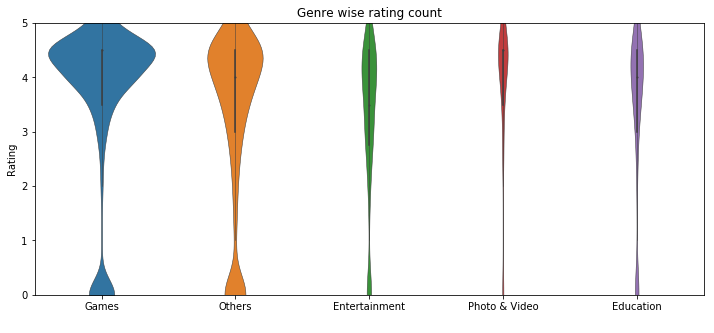

In [23]:
# Rating distribution per category

import seaborn as sns

plt.figure(figsize=(12,5))
plt.style.use('fast')
plt.ylim([0,5])

plt.title('Genre wise rating count')

sns.violinplot(data=appleStoreDf, y ='user_rating',x='broad_genre',
               vertical=True,kde=False ,linewidth=0.5,
               scale ='count',width = 0.8)

plt.xlabel(" ")
plt.ylabel("Rating")
plt.show()

In [24]:
def paid(x):
    if x>0:
        return 'Paid'
    else :
        return'Free'

appleStoreDf['category']= appleStoreDf.price.apply(lambda x : paid(x))
appleStoreDf.tail()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,...,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,anomaly25,anomaly27,anomaly37,broad_genre,category
7192,11081,1187617475,Kubik,126644224,USD,0.00,142,75,4.5,4.5,...,Games,38,5,1,1,NaN,NaN,NaN,Games,Free
7193,11082,1187682390,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,...,Games,38,0,1,1,NaN,NaN,NaN,Games,Free
7194,11087,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,...,Utilities,37,1,1,1,NaN,NaN,NaN,Others,Paid
7195,11089,1187838770,VR Roller Coaster World - Virtual Reality,97235968,USD,0.00,85,32,4.5,4.5,...,Games,38,0,2,1,NaN,NaN,NaN,Games,Free
7196,11097,1188375727,Escape the Sweet Shop Series,90898432,USD,0.00,3,3,5.0,5.0,...,Games,40,0,2,1,NaN,NaN,NaN,Games,Free


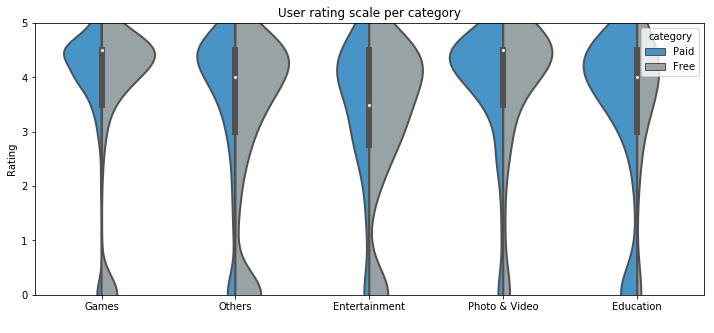

In [25]:
plt.figure(figsize=(12,5))
plt.style.use('fast')
plt.ylim([0,5])
plt.title("User rating scale per category")
sns.violinplot(data=appleStoreDf, y ='user_rating',x='broad_genre',hue='category',
               vertical=True,kde=False,split=True ,linewidth=2,
               scale ='count', palette=['#3498db','#95a5a6'])
plt.xlabel(" ")
plt.ylabel("Rating")

plt.show()


In [26]:
#Anomaly detection with k-mean
from sklearn.preprocessing import LabelEncoder

data = appleStoreDf[['user_rating', 'user_rating_ver','price','cont_rating','prime_genre']][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)]

data['cont_rating'] = data['cont_rating'].astype('object').str.replace('+', '')
data['cont_rating'] = pd.to_numeric(data['cont_rating'])

obj = LabelEncoder()
data["prime_genre"] = obj.fit_transform(data["prime_genre"].astype('object'))

data.head()

,user_rating,user_rating_ver,price,cont_rating,prime_genre
0,4.0,4.5,3.99,4,7
1,4.0,3.5,0.00,4,15
2,3.5,4.5,0.00,4,22
3,4.0,4.5,0.00,12,17
4,4.5,5.0,0.00,4,16


In [27]:
from sklearn.decomposition import PCA

# reduce to 2 importants features
pca = PCA(n_components=2)
data = pca.fit_transform(data)
# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

In [28]:
data.count()

0    5754
1    5754
dtype: int64

In [29]:
data.head()

,0,1
0,0.588087,0.016882
1,-1.114756,0.820856
2,-2.029291,1.987429
3,-1.438900,1.194949
4,-1.241221,0.983826


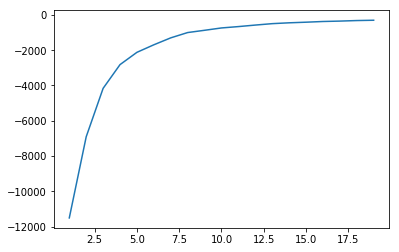

In [30]:
from sklearn.cluster import KMeans
# calculate with different number of centroids to see the loss plot (elbow method)
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [31]:
print(len(kmeans[5].predict(data)))
print(len(appleStoreDf))

5754
7197


In [32]:
appleStoreDf.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,...,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,anomaly25,anomaly27,anomaly37,broad_genre,category
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,...,Games,38,5,10,1,0.0,0.0,0.0,Games,Paid
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,...,Productivity,37,5,23,1,0.0,0.0,0.0,Others,Free
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,...,Weather,37,5,3,1,0.0,0.0,0.0,Others,Free
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,...,Shopping,37,5,9,1,0.0,0.0,0.0,Others,Free
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,...,Reference,37,5,45,1,0.0,0.0,0.0,Others,Free


In [33]:
appleStoreDf['cont_rating'] = appleStoreDf['cont_rating'].astype('object').str.replace('+', '')

In [34]:
appleStoreDf['previous_rating_count'] = appleStoreDf['rating_count_tot'] - appleStoreDf['rating_count_ver']
appleStoreDf['size_bytes_in_MB'] = appleStoreDf['size_bytes'] / (1024 * 1024.0)
appleStoreDf['isNotFree'] = appleStoreDf['price'].apply(lambda x: 1 if x > 0 else 0)

In [35]:
tempDf = appleStoreDf[['prime_genre','price','previous_rating_count','user_rating','user_rating_ver','cont_rating',
                       'size_bytes_in_MB','isNotFree','size_bytes_in_MB','sup_devices.num',
                       'ipadSc_urls.num','lang.num','vpp_lic',]].copy()

In [36]:
tempDf = tempDf[(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)]

In [37]:
tempDf.head()

,prime_genre,price,previous_rating_count,user_rating,user_rating_ver,cont_rating,size_bytes_in_MB,isNotFree,size_bytes_in_MB,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,Games,3.99,21266,4.0,4.5,4,96.119141,1,96.119141,38,5,10,1
1,Productivity,0.00,161039,4.0,3.5,4,151.232422,0,151.232422,37,5,23,1
2,Weather,0.00,185761,3.5,4.5,4,95.867188,0,95.867188,37,5,3,1
3,Shopping,0.00,261592,4.0,4.5,12,122.558594,0,122.558594,37,5,9,1
4,Reference,0.00,980600,4.5,5.0,4,88.476562,0,88.476562,37,5,45,1


In [38]:
tempDf.count()

prime_genre              5754
price                    5754
previous_rating_count    5754
user_rating              5754
user_rating_ver          5754
cont_rating              5754
size_bytes_in_MB         5754
isNotFree                5754
size_bytes_in_MB         5754
sup_devices.num          5754
ipadSc_urls.num          5754
lang.num                 5754
vpp_lic                  5754
dtype: int64

In [39]:
data[0].head()

0    0.588087
1   -1.114756
2   -2.029291
3   -1.438900
4   -1.241221
Name: 0, dtype: float64

In [40]:
tempDf['cluster'] = kmeans[5].predict(data)
tempDf['principal_feature1'] = data[0]
tempDf['principal_feature2'] = data[1]
tempDf['cluster'].value_counts()

0    2736
1    1121
5     997
4     860
3      39
2       1
Name: cluster, dtype: int64

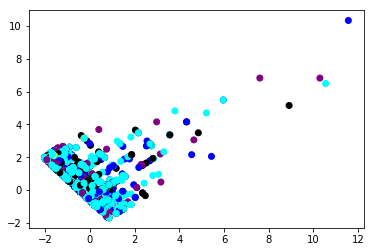

In [41]:
#plot the different clusters with the 2 main features
fig, ax = plt.subplots()
colors = {0:'cyan', 1:'blue', 2:'green', 3:'yellow', 4:'purple',5:'black'}
ax.scatter(tempDf['principal_feature1'], tempDf['principal_feature2'], c=tempDf["cluster"].apply(lambda x: colors[x]))
plt.show()

In [42]:
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

In [43]:
tempDf.isna().sum()

prime_genre                 0
price                       0
previous_rating_count       0
user_rating                 0
user_rating_ver             0
cont_rating                 0
size_bytes_in_MB            0
isNotFree                   0
size_bytes_in_MB            0
sup_devices.num             0
ipadSc_urls.num             0
lang.num                    0
vpp_lic                     0
cluster                     0
principal_feature1       1064
principal_feature2       1064
dtype: int64

In [44]:
tempDf = tempDf.dropna()

In [45]:
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[5])
number_of_outliers = int(0.05*len(distance))
threshold = distance.nlargest(number_of_outliers).min() 

# anomaly21 contain the anomaly result of method 2.1 Cluster (0:normal, 1:anomaly) 
tempDf['anomaly21'] = (distance >= threshold).astype(int)

C:\Users\Dhwani\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


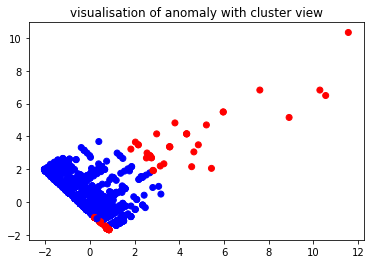

In [46]:
# visualisation of anomaly with cluster view
fig, ax = plt.subplots()
colors = {0:'blue', 1:'red'}
ax.scatter(tempDf['principal_feature1'], tempDf['principal_feature2'], c=tempDf["anomaly21"].apply(lambda x: colors[x]))

plt.title('visualisation of anomaly with cluster view')
plt.show()